# Introduction

Notebook to analyse the PyBossa taskruns from the Volunteers App. The analysis made on this notebook is needed once a number of volunteers participating of the empirical study, changed during the execution time, becoming necessary to rerun some tasks to distribute more equally the amount of tasks by volunteer.

**The final amount should be around 10 tasks/volunteer.**

# Load Libraries and Data

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import modules.utils.firefox_dataset_p2 as fd

from sklearn.metrics import cohen_kappa_score

taskruns_1 = fd.TaskRuns.read_volunteers_taskruns_1_df()
taskruns_2 = fd.TaskRuns.read_volunteers_taskruns_2_df()

taskruns = pd.concat([taskruns_1, taskruns_2])
print('TaskRuns shape: {}'.format(taskruns.shape))

TaskRuns_1 shape: (113, 11)
TaskRuns_2 shape: (10, 11)
TaskRuns shape: (123, 11)


# Defective Taskruns 
The taskruns detailed below must be excluded from the generation of the oracles and the analysis in general, once we had tecnical problems recording the correct answers for them during the execution of the empirical study.

In [3]:
taskruns_1.iloc[0,:]

bug_id                                                   1181835
user_id                                                     None
task_id                                                     1628
created                               2019-02-22T13:30:47.532426
finish_time                           2019-02-22T13:34:43.593370
user_ip                                           148.58.130.242
link           <link rel='self' title='taskrun' href='http://...
timeout                                                     None
project_id                                                     7
id                                                           143
answers                0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Name: 0, dtype: object

In [4]:
taskruns_2.iloc[0,:]

bug_id                                                   1315514
user_id                                                        2
task_id                                                     1918
created                               2019-03-01T18:33:32.762401
finish_time                           2019-03-01T18:37:32.799841
user_ip                                                     None
link           <link rel='self' title='taskrun' href='http://...
timeout                                                     None
project_id                                                     9
id                                                           271
answers                0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
Name: 0, dtype: object

# Volunteers Taskruns

In [5]:
taskruns['created'] = pd.to_datetime(taskruns['created'], yearfirst=True)
taskruns['created_month'] = taskruns.apply(lambda row: row['created'].month, axis=1)
taskruns['created_day'] = taskruns.apply(lambda row: row['created'].day, axis=1)
taskruns['created_hour'] = taskruns.apply(lambda row: row['created'].hour, axis=1)

grouped_trs = taskruns.groupby(by=['created_month','created_day','created_hour']).count()
grouped_trs

bug_id  user_id  task_id  created  \
created_month created_day created_hour                                      
2             22          13                15       15       15       15   
                          14                 7        7        7        7   
                          15                 8        8        8        8   
              25          12                12       12       12       12   
                          18                20       20       20       20   
                          19                 1        1        1        1   
              26          17                10       10       10       10   
                          19                12       12       12       12   
              27          19                11       11       11       11   
3             1           14                17       17       17       17   
                          18                10       10       10       10   

                                        finish_time  user_ip  link  timeout  \
created_month created_day created_hour                                        
2             22          13                     15       15    15       15   
                          14                      7        7     7        7   
                          15                      8        8     8        8   
              25          12                     12       12    12       12   
                          18                     20       20    20       20   
                          19                      1        1     1        1   
              26          17                     10       10    10       10   
                          19                     12       12    12       12   
              27          19                     11       11    11       11   
3             1           14                     17       17    17       17   
                          18                     10       10    10       10   

                                        project_id  id  answers  
created_month created_day created_hour                           
2             22          13                    15  15       15  
                          14                     7   7        7  
                          15                     8   8        8  
              25          12                    12  12       12  
                          18                    20  20       20  
                          19                     1   1        1  
              26          17                    10  10       10  
                          19                    12  12       12  
              27          19                    11  11       11  
3             1           14                    17  17       17  
                          18                    10  10       10

## Volunteers Contributions

In [6]:
trs_p1 = taskruns[(taskruns.created_day == 22) & (taskruns.created_hour==13)].loc[:,'task_id']
trs_p2 = taskruns[(taskruns.created_day == 22) & ((taskruns.created_hour==14) | (taskruns.created_hour == 15))].loc[:,'task_id']
trs_p3 = taskruns[(taskruns.created_day == 25) & (taskruns.created_hour==12)].loc[:,'task_id']
trs_p4 = taskruns[(taskruns.created_day == 25) & ((taskruns.created_hour==18) | (taskruns.created_hour == 19))].loc[:,'task_id']
trs_p5 = taskruns[(taskruns.created_day == 26) & (taskruns.created_hour == 17)].loc[:,'task_id']
trs_p6 = taskruns[(taskruns.created_day == 26) & (taskruns.created_hour == 19)].loc[:,'task_id']
trs_p7 = taskruns[(taskruns.created_day == 27) & (taskruns.created_hour == 19)].loc[:,'task_id']
trs_p8 = taskruns[(taskruns.created_day == 1) & (taskruns.created_hour == 14)].loc[:,'task_id']
trs_p9 = taskruns[(taskruns.created_day == 1) & (taskruns.created_hour == 18)].loc[:,'task_id']

contri_df = pd.DataFrame(columns=['contributor','answers'])
contri_df['contributor'] = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']
contri_df['answers'] = [trs_p1.values, trs_p2.values, trs_p3.values, trs_p4.values, trs_p5.values, trs_p6.values, trs_p7.values, trs_p8.values, trs_p9.values]
contri_df['amount_answered'] = contri_df.apply(lambda row : len(row['answers']), axis=1)

contri_df

,contributor,answers,amount_answered
0,p1,"[1628, 1629, 1630, 1631, 1632, 1633, 1634, 163...",15
1,p2,"[1643, 1644, 1645, 1646, 1647, 1648, 1649, 165...",15
2,p3,"[1658, 1659, 1660, 1661, 1662, 1663, 1664, 166...",12
3,p4,"[1670, 1671, 1672, 1673, 1674, 1675, 1676, 167...",21
4,p5,"[1639, 1640, 1641, 1642, 1654, 1655, 1656, 165...",10
5,p6,"[1681, 1682, 1683, 1684, 1685, 1686, 1687, 168...",12
6,p7,"[1693, 1694, 1695, 1696, 1697, 1698, 1699, 170...",11
7,p8,"[1704, 1705, 1706, 1707, 1708, 1709, 1710, 171...",17
8,p9,"[1918, 1919, 1920, 1921, 1922, 1923, 1924, 192...",10


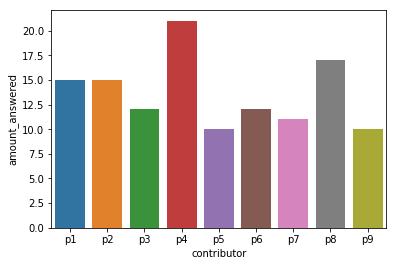

In [7]:
sns.barplot(data=contri_df, y=contri_df['amount_answered'], x=contri_df['contributor'])

## Expected composition of resolution of tasks:

* Lucas    - P1: 11 tasks
* Marcos   - P2: 11 tasks
* Diego    - P3: 10 tasks
* Isabelly - P4: 11 tasks
* Anderson - P5: 10 tasks
* Wesley   - P6: 10 tasks
* Jaziel   - P7: 10 tasks 
* MatheusB - P8: 10 tasks
* MatheusG - P9: 10 tasks

**Total: 93 tasks**

In [8]:
contrib_10 = ['p3','p5','p7','p8','p6','p9']
contrib_11 = ['p1','p2','p4']

def tasks_to_rerun(row):
    if row['contributor'] in contrib_10:
        if len(row['answers']) > 10:
            return row['answers'][10:]
        else:
            return []
    else:
        if row['contributor'] in contrib_11:
            if len(row['answers']) > 11:
                return row['answers'][11:]
            else:
                return []

contri_df['tasks_to_rerun'] = contri_df.apply(lambda row : tasks_to_rerun(row), axis=1)
contri_df['solved_tasks_range'] = contri_df.apply(lambda row : (row['answers'][0], row['answers'][-1]), axis=1)
contri_df

,contributor,answers,amount_answered,tasks_to_rerun,solved_tasks_range
0,p1,"[1628, 1629, 1630, 1631, 1632, 1633, 1634, 163...",15,"[1639, 1640, 1641, 1642]","(1628, 1642)"
1,p2,"[1643, 1644, 1645, 1646, 1647, 1648, 1649, 165...",15,"[1654, 1655, 1656, 1657]","(1643, 1657)"
2,p3,"[1658, 1659, 1660, 1661, 1662, 1663, 1664, 166...",12,"[1668, 1669]","(1658, 1669)"
3,p4,"[1670, 1671, 1672, 1673, 1674, 1675, 1676, 167...",21,"[1681, 1682, 1683, 1684, 1685, 1686, 1687, 168...","(1670, 1690)"
4,p5,"[1639, 1640, 1641, 1642, 1654, 1655, 1656, 165...",10,[],"(1639, 1669)"
5,p6,"[1681, 1682, 1683, 1684, 1685, 1686, 1687, 168...",12,"[1691, 1692]","(1681, 1692)"
6,p7,"[1693, 1694, 1695, 1696, 1697, 1698, 1699, 170...",11,[1703],"(1693, 1703)"
7,p8,"[1704, 1705, 1706, 1707, 1708, 1709, 1710, 171...",17,"[1714, 1715, 1716, 1717, 1718, 1719, 1720]","(1704, 1720)"
8,p9,"[1918, 1919, 1920, 1921, 1922, 1923, 1924, 192...",10,[],"(1918, 1927)"


## Tasks To Rerun

In [9]:
for arr in contri_df.tasks_to_rerun.values:
    print('Tasks to Rerun: {}'.format(arr))

Tasks to Rerun: [1639 1640 1641 1642]
Tasks to Rerun: [1654 1655 1656 1657]
Tasks to Rerun: [1668 1669]
Tasks to Rerun: [1681 1682 1683 1684 1685 1686 1687 1688 1689 1690]
Tasks to Rerun: []
Tasks to Rerun: [1691 1692]
Tasks to Rerun: [1703]
Tasks to Rerun: [1714 1715 1716 1717 1718 1719 1720]
Tasks to Rerun: []


## Count TaskRuns by Task

In [10]:
cols = ['task_id','id']

df = taskruns[cols].groupby(by='task_id').count()
df.rename(columns={"id" :'count_trs'}, inplace=True)
df.head(10)

,count_trs
task_id,
1628,1
1629,1
1630,1
1631,1
1632,1
1633,1
1634,1
1635,1
1636,1


## Check All Tasks Have At Least One Answer

In [11]:
print(set(df.index) - set(range(1628,1720+1,1)))

{1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1918, 1919}


## Check Answers of Rerunned Tasks

In [12]:
rerunned_tasks = []
for set_rerunned_tasks in contri_df.tasks_to_rerun.values:
    for rr_task in set_rerunned_tasks:
        rerunned_tasks.append(rr_task)

remaining_tasks = df[(df.index.isin(rerunned_tasks)) & (df.count_trs < 2)]
print(remaining_tasks.shape)
remaining_tasks

(10, 1)


,count_trs
task_id,
1691,1
1692,1
1703,1
1714,1
1715,1
1716,1
1717,1
1718,1
1719,1


## Bug Reports with Missing TaskRuns

In [13]:
taskruns[taskruns.task_id.isin(remaining_tasks.index)].bug_id

83     1315514
84     1316126
95     1335538
106    1357458
107    1365887
108    1408361
109    1430603
110    1432915
111    1449700
112    1451475
Name: bug_id, dtype: int64

# Compare Order of Taskruns

The order of the taskruns must be the same, ordered by the finish time or by the bug_id fields.

In [14]:
taskruns_ordered_by_finish_time = taskruns.sort_values(by='finish_time')
taskruns_ordered_by_bug_id = taskruns.copy()  ## already ordered by bug_id

diffs = taskruns_ordered_by_finish_time.bug_id - taskruns_ordered_by_bug_id.bug_id
d = np.sum(diffs)

assert d == 0